# Setup


In [ ]:
import numpy as np
import sklearn.datasets
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns

digits_initial = sklearn.datasets.load_digits()
digits = pd.DataFrame(data = digits_initial.data, columns = None)

# Understanding the Data and Prepreocessing

In [3]:
display(digits)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


Checking the data to see if it requires preprosessing. Since no datapoints are missing and all data is one the same scale already, no further preprocessing steps were taken.

Missing values per column:
0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64


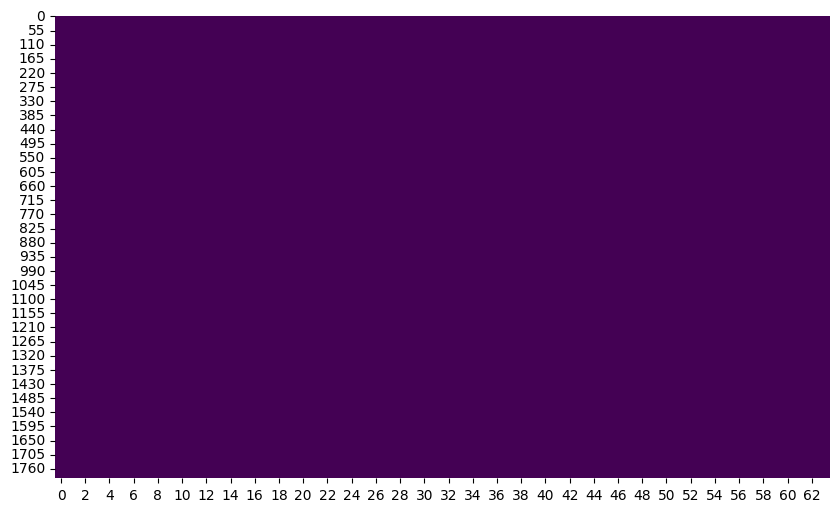

In [8]:
missing_values = digits.isnull().sum()
print("Missing values per column:")
print(missing_values)

plt.figure(figsize=(10,6))
sns.heatmap(digits.isnull(), cbar=False, cmap='viridis')
plt.show()

# Reducing Dimensionality

In [15]:
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
digits_embedded_tnse = TSNE(n_components=2).fit_transform(digits)
digits_embedded_mds = MDS(n_components=2, normalized_stress='auto').fit_transform(digits)

#checking if dimensionality reduction resulted in 2 dimensions
print(digits_embedded_tnse.shape)
print(digits_embedded_mds.shape)


(1797, 2)
(1797, 2)


# Visualising the structure of t-NSE and MDS

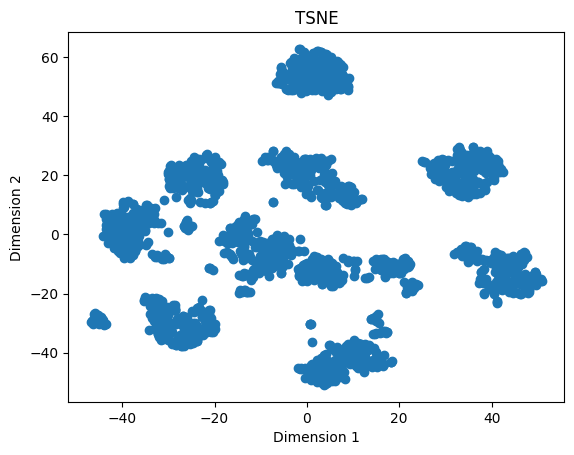

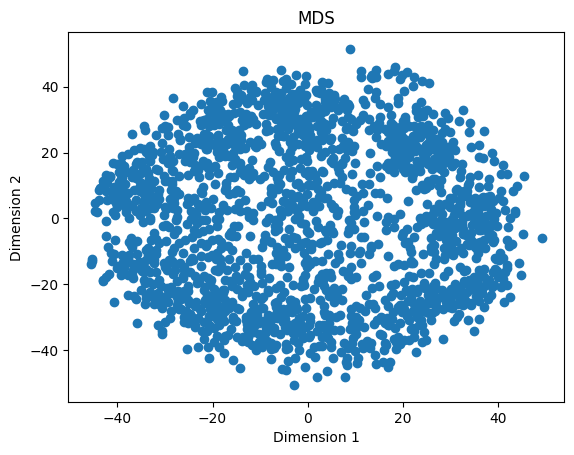

In [16]:
x_tsne = digits_embedded_tnse[:,0]
y_tsne = digits_embedded_tnse[:,1]

x_mds = digits_embedded_mds[:,0]
y_mds = digits_embedded_mds[:,1]

plt.scatter(x_tsne, y_tsne)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('TSNE')
plt.show()

plt.scatter(x_mds, y_mds)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS')
plt.show()

# Autoencoder

The following code is an adaptation of https://keras.io/api/datasets/mnist/

(1437, 64)
(360, 64)
Epoch 1/50
6/6 [==============================] - 1s 49ms/step - loss: 0.6932 - val_loss: 0.6915
Epoch 2/50
6/6 [==============================] - 0s 23ms/step - loss: 0.6904 - val_loss: 0.6887
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.6877 - val_loss: 0.6859
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6848 - val_loss: 0.6830
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6818 - val_loss: 0.6797
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6784 - val_loss: 0.6761
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 0.6745 - val_loss: 0.6720
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6702 - val_loss: 0.6674
Epoch 9/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6654 - val_loss: 0.6624
Epoch 10/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6601 - val_loss: 0.6568
Epoch 11

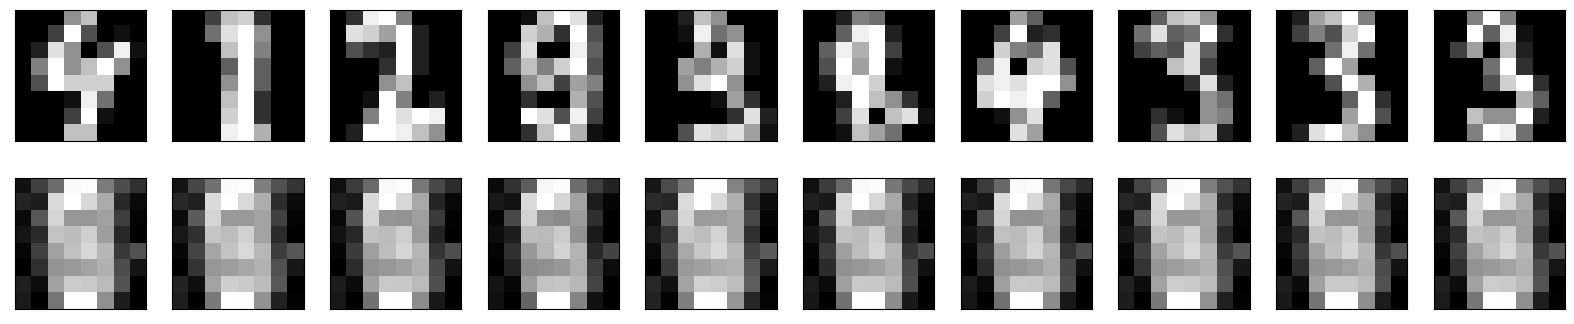

In [32]:
import keras
from keras import layers
from sklearn.model_selection import train_test_split

# This is the size of our encoded representations
encoding_dim = 2  # 2 integers -> compression of factor 32, input is 64 integers

# This is our input image
input_img = keras.Input(shape=(64,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(64, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

x_train, x_test = train_test_split(digits_initial.data, test_size=0.2)

x_train = x_train.astype('float32') / 16.
x_test = x_test.astype('float32') / 16.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Checking for Overfitting and Visualising the Structure of the Autoencoder

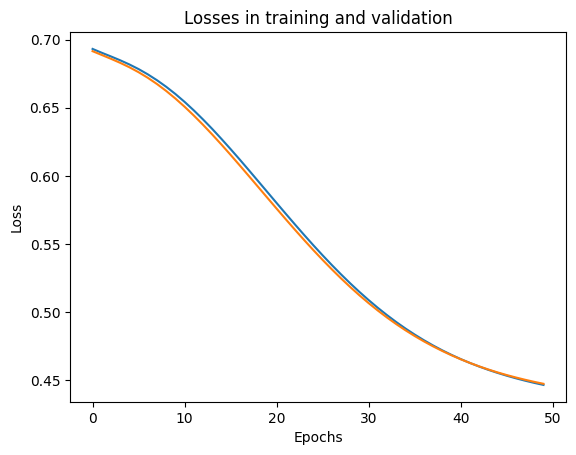

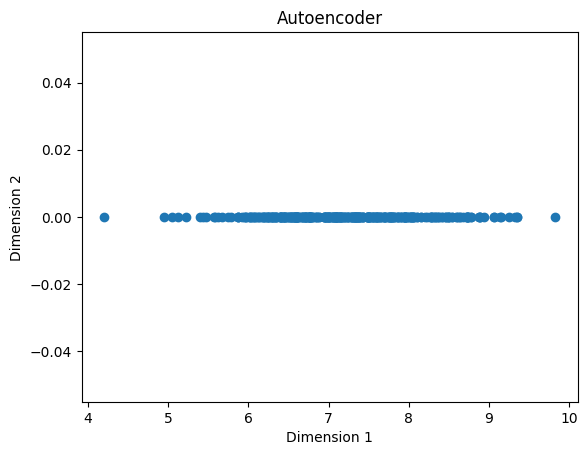

In [34]:
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses in training and validation')
plt.show()


x_enc = encoded_imgs[:,0]
y_enc = encoded_imgs[:,1]

plt.scatter(x_enc, y_enc)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Autoencoder')
plt.show()

